In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

: 

In [2]:
test=pd.read_csv("test_data.csv")
train=pd.read_csv("training_data.csv")

In [3]:
test.head()
train.head()
train.info()
train=train.drop('Unnamed: 133',axis=1)
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
y_train=train.prognosis
x_train=train.drop('prognosis',axis=1)
x_train
y_train

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

C:\Users\Rakesh Reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prognosis', ylabel='count'>

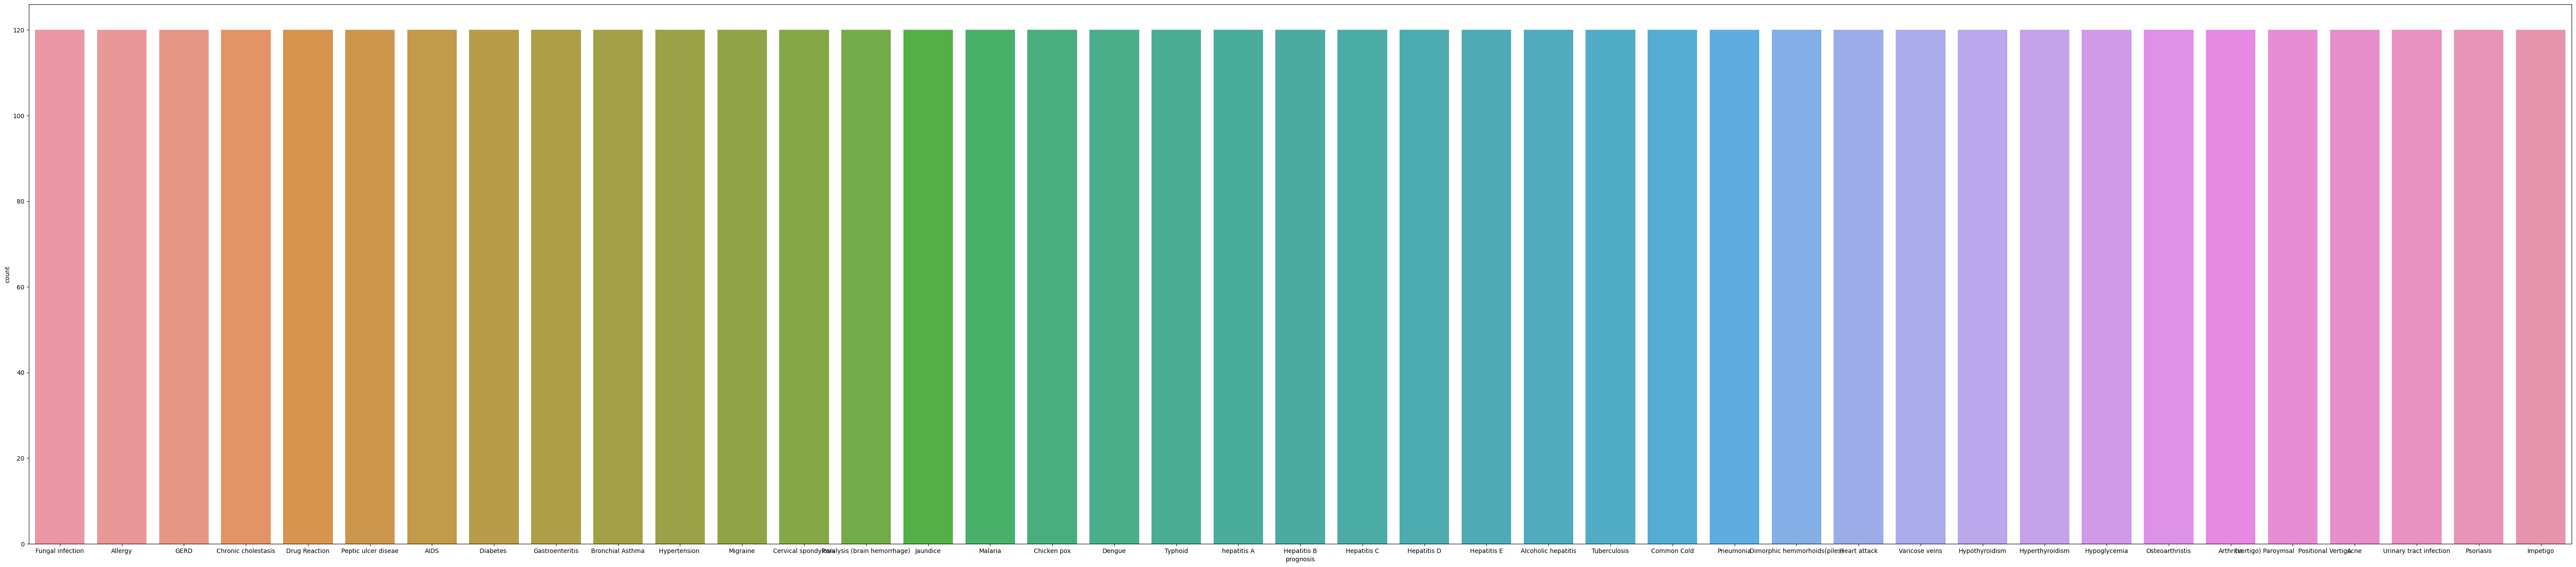

In [5]:

y_test=test.prognosis

x_test=test.drop('prognosis',axis=1)
x_test.head()
y_test.head()

f,ax = plt.subplots(figsize=(75,16))
sns.countplot(y_train,label="Count",ax=ax) 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)
y_pred=clf_rf.predict(x_test)
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)

Accuracy is:  0.9761904761904762


In [7]:
pickle.dump(clr_rf,open('model.pkl','wb'))


In [14]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [15]:
col=x_train.columns
type(col)
len(col)

inputt = "itching stomach_pain skin_rash".split(' ')
inputt

b=[0]*len(col)
for x in range(0,132):
    for y in inputt:
        if(col[x]==y):
            b[x]=1
b=np.array(b)
b=b.reshape(1,132)
sol=clf_rf.predict(b)
sol

C:\Users\Rakesh Reddy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Drug Reaction'], dtype=object)

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
gnb = GaussianNB()
gnb = gnb.fit(x_train,y_train)
y_predi=clf_rf.predict(x_test)
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)

Accuracy is:  0.9761904761904762


In [17]:
print(classification_report(y_test,y_predi
                           ))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           